# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
\begin{equation}
\hat m = \frac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}
\end{equation}


**Intercept**:
\begin{equation}
\hat c = \bar{y} - \hat m\bar{x}
\end{equation}

**Prediction**: 
\begin{equation}
\hat{y} = \hat mx + \hat c
\end{equation}

**R-Squared**: 
\begin{equation}
R^2 = 1- \frac{SS_{RES}}{SS_{TOT}} = 1 - \frac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2}
\end{equation}


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

%matplotlib inline

In [47]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

def m_and_c(X,Y):

    m = np.round((np.mean(X) * np.mean(Y) - np.mean(X*Y)) 
             / (np.mean(X)**2 - np.mean(X*X)), 2)
    c = np.round(np.mean(Y) - m*np.mean(X), 2)
    return m, c

def reg(X,Y):
    m, c = m_and_c(X,Y)
    reg = np.array([m*i + c for i in X])
    return reg

def R2_f(X,Y):
    

    num = np.sum((Y - reg(X,Y))**2)
    dnum = np.sum((Y - np.mean(Y))**2)

    R2 = np.round(1 - num / dnum, 2)
    return R2


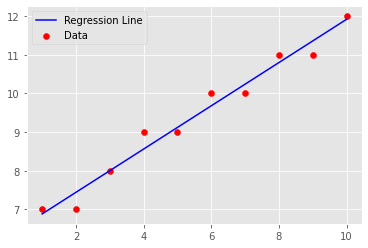

In [48]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

plt.scatter(X,Y, color = "Red", label = "Data")
plt.plot(X, reg(X,Y), color = "Blue", label = "Regression Line")
plt.legend();

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

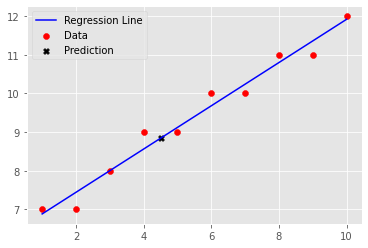

In [49]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x = 4.5
m, c = m_and_c(X,Y)
y_predict = m_and_c(X,Y)[0] * x + m_and_c(X,Y)[1]
y_predict

plt.scatter(X,Y, color = "Red", label = "Data")
plt.scatter(x,y_predict, color = "Black", label = "Prediction", marker = "X")
plt.plot(X, reg(X,Y), color = "Blue", label = "Regression Line")
plt.legend();

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 


In [50]:
import pandas as pd

df = pd.read_csv("heightweight.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   height  20 non-null     int64
 1   weight  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [53]:
h = np.array(df.height)

w = np.array(df.weight)

num = np.sum((w - reg(h,w))**2)
dnum = np.sum((w - np.mean(w))**2)

R2 = np.round(1 - num / dnum, 2)
# R2

R2_f(h,w)

0.96

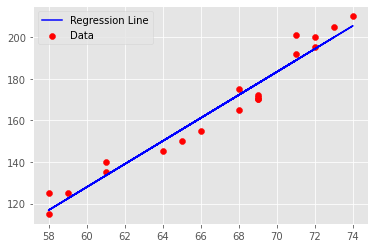

In [35]:
m,c = m_and_c(h,w)



plt.scatter(h,w, color = "Red", label = "Data")
plt.plot(h, reg(h,w), color = "Blue", label = "Regression Line")
plt.legend();

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 